In [1]:
import pandas as pd
from collections import Counter
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tweets_democrats_house_file = '../data_collection/tweets_democrats_house.txt'
tweets_republicans_house_file = '../data_collection/tweets_republicans_house.txt' 

In [13]:
tweets_democrats = []
with open(tweets_democrats_house_file) as f:
    for line in f:
        tweets_democrats.append(json.loads(line))
        
hashtags_list_democrats = []
for tweet in tweets_democrats:
    hashtags_list_democrats += tweet['hashtags']
hashtags_list_democrats = [hashtag.lower() for hashtag in hashtags_list_democrats]

tweets_republicans = []
with open(tweets_republicans_house_file) as f:
    for line in f:
        tweets_republicans.append(json.loads(line))
        
hashtags_list_republicans = []

for tweet in tweets_republicans:
    hashtags_list_republicans += tweet['hashtags']
hashtags_list_republicans = [hashtag.lower() for hashtag in hashtags_list_republicans]

In [15]:
print(tweets_democrats[0:5])
print(hashtags_list_democrats[0:5])

[{'account': 'RepDarrenSoto', 'hashtags': ['DQAwards'], 'urls': [], 'mentions': ['StephSmithFL', 'DanP_ATT']}, {'account': 'RepDarrenSoto', 'hashtags': ['FlashbackFriday'], 'urls': [], 'mentions': ['ArringtonD3']}, {'account': 'RepDarrenSoto', 'hashtags': [], 'urls': ['https://twitter.com/i/web/status/939232400206385155'], 'mentions': []}, {'account': 'RepDarrenSoto', 'hashtags': ['Dreamers'], 'urls': [], 'mentions': ['HispanicCaucus']}, {'account': 'RepDarrenSoto', 'hashtags': [], 'urls': [], 'mentions': ['Nature_Florida', 'RepDarrenSoto']}]
['dqawards', 'flashbackfriday', 'dreamers', 'puertorico', 'taxscambill']


### Sample analysis

For 100 politics (50 democrats and 50 republicans), we have extracted their last 100 tweets from their official twitter accounts. Having the model we want to build in mind, this first part will be a data exploration, to understand what data we have and check the data quality. This will also allow us to clean the data if needed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

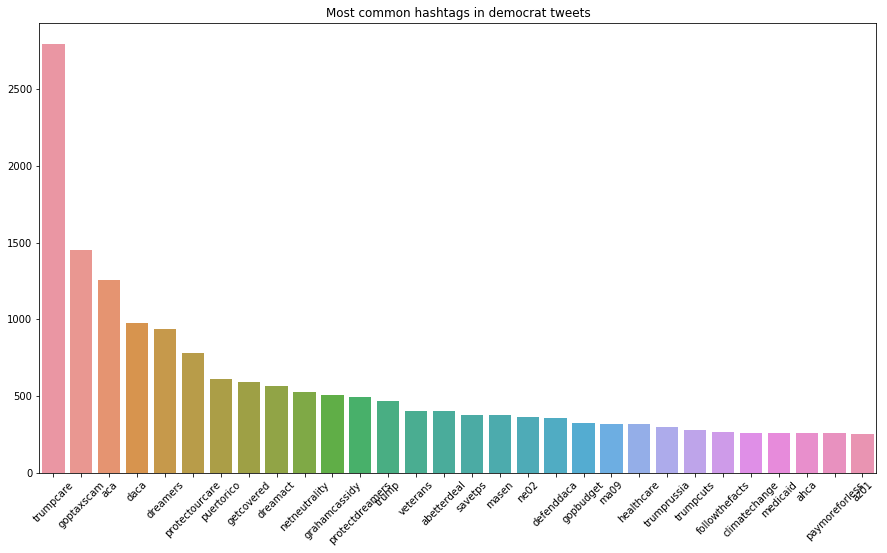

In [16]:
hashtags_counter = dict(Counter(hashtags_list_democrats).most_common(30))
df = pd.DataFrame(hashtags_counter, index=[0])
order_plot = [hashtag[0] for hashtag in Counter(hashtags_list_democrats).most_common(30)]

a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.barplot(ax=ax, data=df, order=order_plot).set_title('Most common hashtags in democrat tweets')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

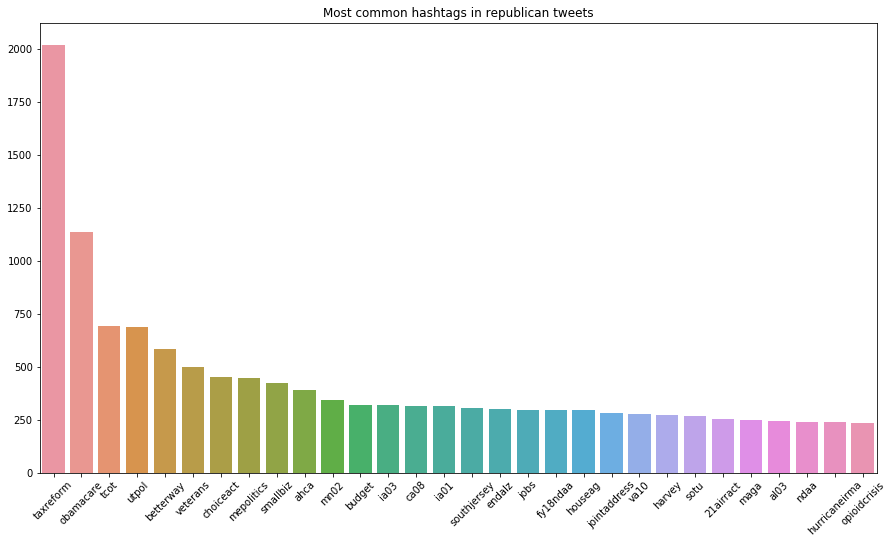

In [17]:
hashtags_counter = dict(Counter(hashtags_list_republicans).most_common(30))
df = pd.DataFrame(hashtags_counter, index=[0])
order_plot = [hashtag[0] for hashtag in Counter(hashtags_list_republicans).most_common(30)]

a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.barplot(ax=ax, data=df, order=order_plot).set_title('Most common hashtags in republican tweets')
plt.xticks(rotation=45)

### Most common hashtags

This first two barplots show the most commons hashtags among the 5000 democrat and 5000 republican tweets that we have gathered. It is very interesting to see that the main topics are not so different. The GOP tax bill was a heavily discussed reform in the US, it is not surprising to see the hashtags 'TaxReform', 'taxreform', and 'GOPTaxScam' top the charts.

NB : Later in the data analysis we will put the hashtags in lowercase, so there is not difference between 'TaxReform' and 'taxreform'.

### Cosine similarity

To get a better understanding of the similarity between the two groups, let's look at a technique called tfidf (term frequency-inverse document frequency). If hashtags are different, then the similarity between groups will be low.

In [18]:
hashtags_text_democrats = ''
for hashtag in hashtags_list_democrats:
    hashtags_text_democrats += ' ' + hashtag.lower()

hashtags_text_republicans = ''
for hashtag in hashtags_list_republicans:
    hashtags_text_republicans += ' ' + hashtag.lower()

In [19]:
vect = TfidfVectorizer(min_df=0.01)
tfidf = vect.fit_transform([hashtags_text_republicans, hashtags_text_democrats])
print(tfidf * tfidf.T.A)

[[ 1.          0.12122505]
 [ 0.12122505  1.        ]]


The cosine similarity between the groups of hashtag is low, which is a good sign for us. Hopefully we will be able to differentiate the political views from an account based on the only hashtags he was using.

### Check hashtags distribution

Given the ongoing exploration, we can already imagine that this is a very high dimensional problem. For the first algorithm iterations, we will only be taking into account the hashtags that have a given number of occurences. Let's plot the occurences count distribution and decide what is the count threshold we will be using at first.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173]), <a list of 174 T

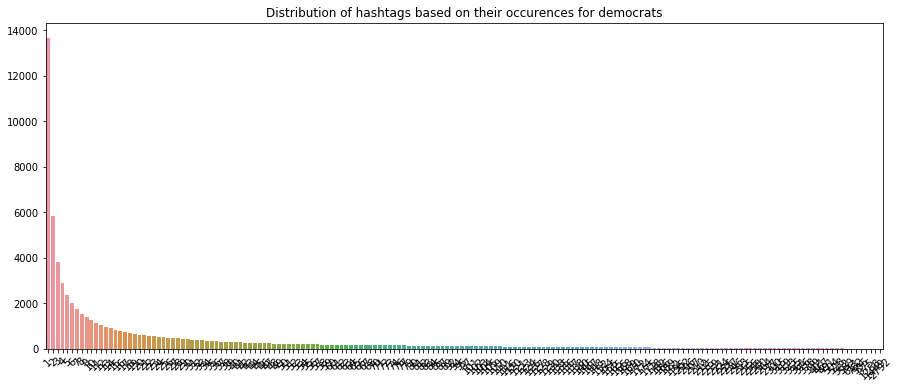

In [8]:
occurences_count_democrats = Counter([value for key, value in Counter(hashtags_list_democrats).items()])
occurences_distribution = dict()
sum_occurences = len(Counter(hashtags_list_democrats).keys())
for key in sorted(Counter(occurences_count_democrats)):
    occurences_distribution[key] = sum_occurences
    sum_occurences -= occurences_count_democrats[key]

df = pd.DataFrame(occurences_distribution, index=[0])

a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.barplot(ax=ax, data=df).set_title('Distribution of hashtags based on their occurences for democrats')
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172]), <a list of 173 Text x

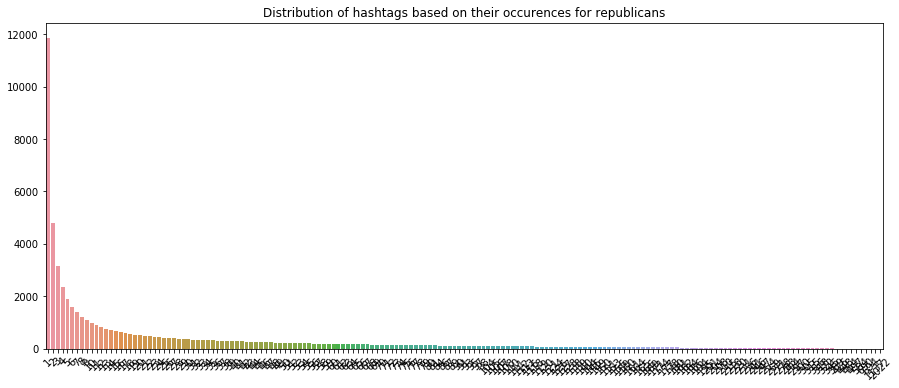

In [9]:
occurences_count_republicans = Counter([value for key, value in Counter(hashtags_list_republicans).items()])
occurences_distribution = dict()
sum_occurences = len(Counter(hashtags_list_republicans).keys())
for key in sorted(Counter(occurences_count_republicans)):
    occurences_distribution[key] = sum_occurences
    sum_occurences -= occurences_count_republicans[key]

df = pd.DataFrame(occurences_distribution, index=[0])

a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.barplot(ax=ax, data=df).set_title('Distribution of hashtags based on their occurences for republicans')
plt.xticks(rotation=45)

Both diagrams show that we can start removing the hashtags that have less than three occurences, in order to keep our space in low dimension and speed calculations at least for the training phase.